<a href="https://colab.research.google.com/github/ashishlamsal/appliance-energy-prediction/blob/main/appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliance Energy Prediction


There are 29 features to describe appliances energy use :
1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10. T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


import warnings

warnings.filterwarnings("ignore")

# Loading [Dataset](https://drive.google.com/drive/u/3/folders/1X3m_s3g-NDRZlE-YZun__Xyhy59hWivK)
- Make shortcut of dataset folder in google drive


In [5]:
# mounting your google drive to colab
from google.colab import drive

drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
# load dataset
path = r"/gdrive/MyDrive/dataset/KAG_energydata.csv"

df = pd.read_csv(path)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
# Checking for null values in all columns
df.isnull().sum().sort_values(ascending=True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

There are no null values in the dataset

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

# Data Visualization

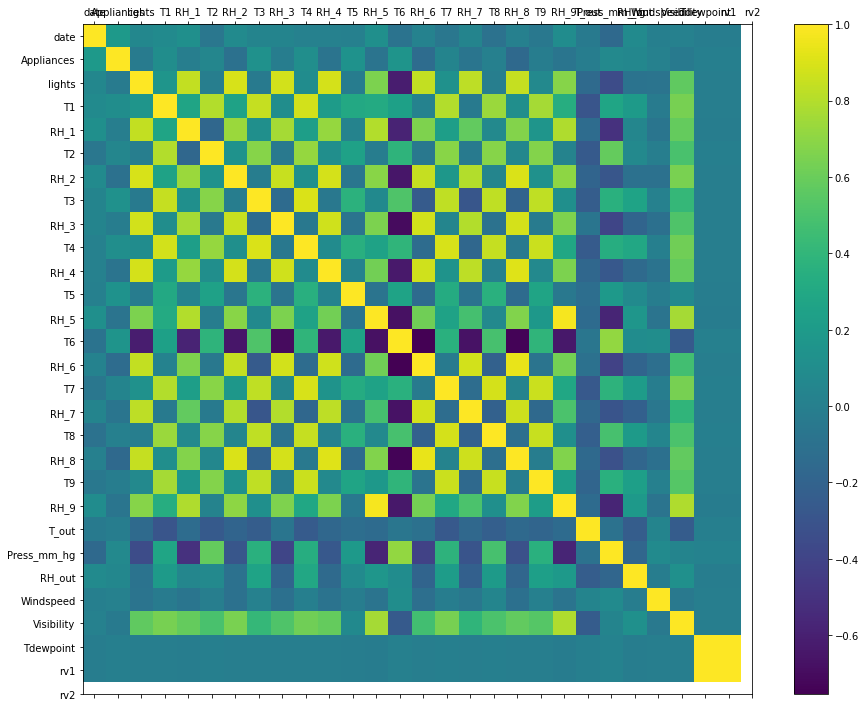

In [ ]:
#  Plot correlation matrix
plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [ ]:
def ts_plot(
    df: pd.DataFrame, cols: list, nrows: int, ncols: int, labels: list, title: str
) -> None:
    """General function to plot temperature and humidity

    Args:
        df (pd.DataFrame): Dataframe
        cols (list): List of columns to plot
        nrows (int): Number of rows for subplot
        ncols (int): Number of columns for subplot
        labels (list): Labels of the plot
        title (str): Title of the plot
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 8))
    ax = ax.flatten()

    for i, icol in enumerate(cols):
        sns.lineplot(data=df[icol], ax=ax[i], label=labels[i])

    plt.suptitle(title)
    plt.show()

In [ ]:
labels = [
    "Kitchen",
    "Living Room",
    "Laundry Room",
    "Office",
    "Bathroom",
    "Outside of Building (North side)",
    "Ironing Room",
    "Teenager Room",
    "Parents Room",
]

In [ ]:
# Divide the columns based on type for clear column management

col_temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

col_hum = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

col_weather = ["Press_mm_hg", "T_out", "RH_out", "Windspeed", "Visibility", "Tdewpoint"]

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

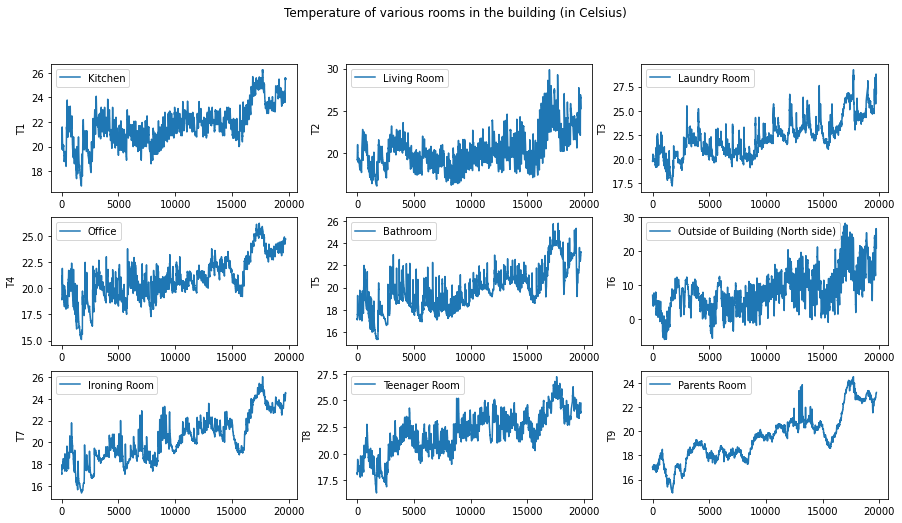

In [ ]:
# Plot temperature features
ts_plot(
    df,
    col_temp,
    3,
    3,
    labels,
    title="Temperature of various rooms in the building (in Celsius)",
)

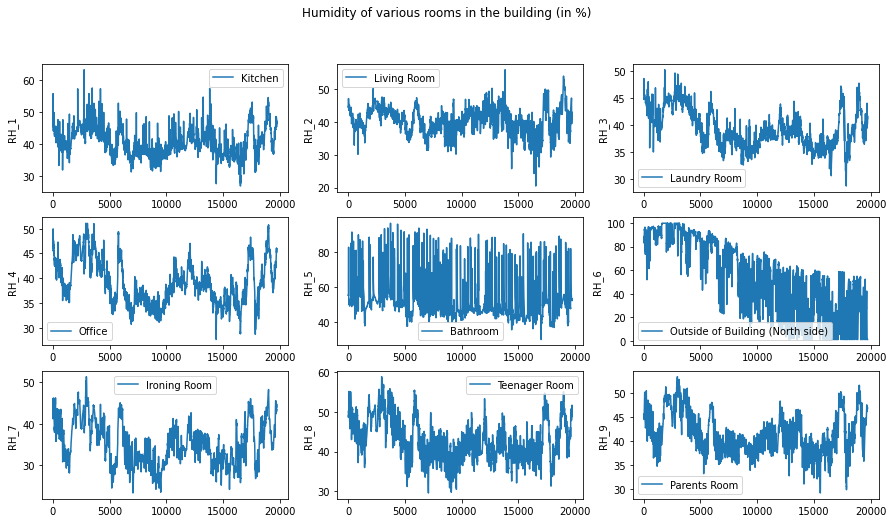

In [ ]:
# Plot humidity features
ts_plot(
    df, col_hum, 3, 3, labels, title="Humidity of various rooms in the building (in %)"
)

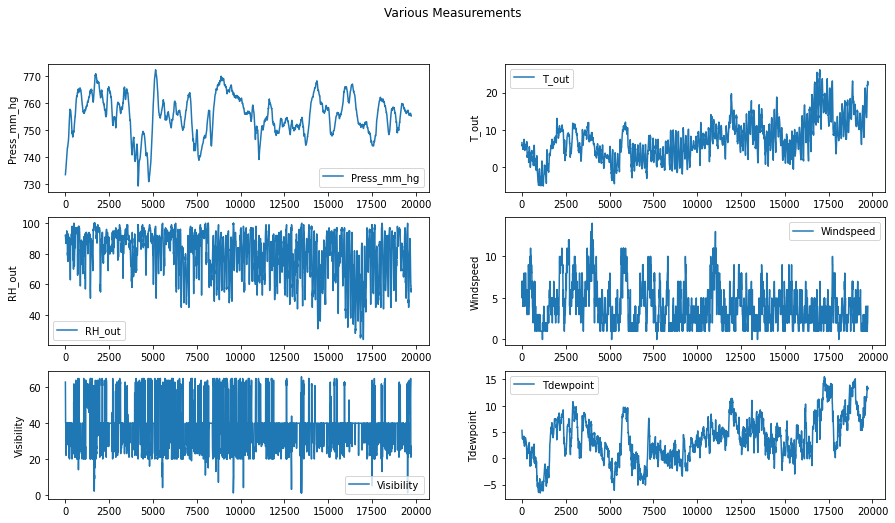

In [ ]:
# Plot features other than temperature and humidity
ts_plot(df, col_weather, 3, 2, col_weather, title="Various Measurements")

# Data Pre Processing


In [ ]:
# Spliting dataset into train and test
df_train, df_test = train_test_split(df, test_size=0.20, random_state=0)
print(df_train.shape, df_test.shape)

(15788, 29) (3947, 29)


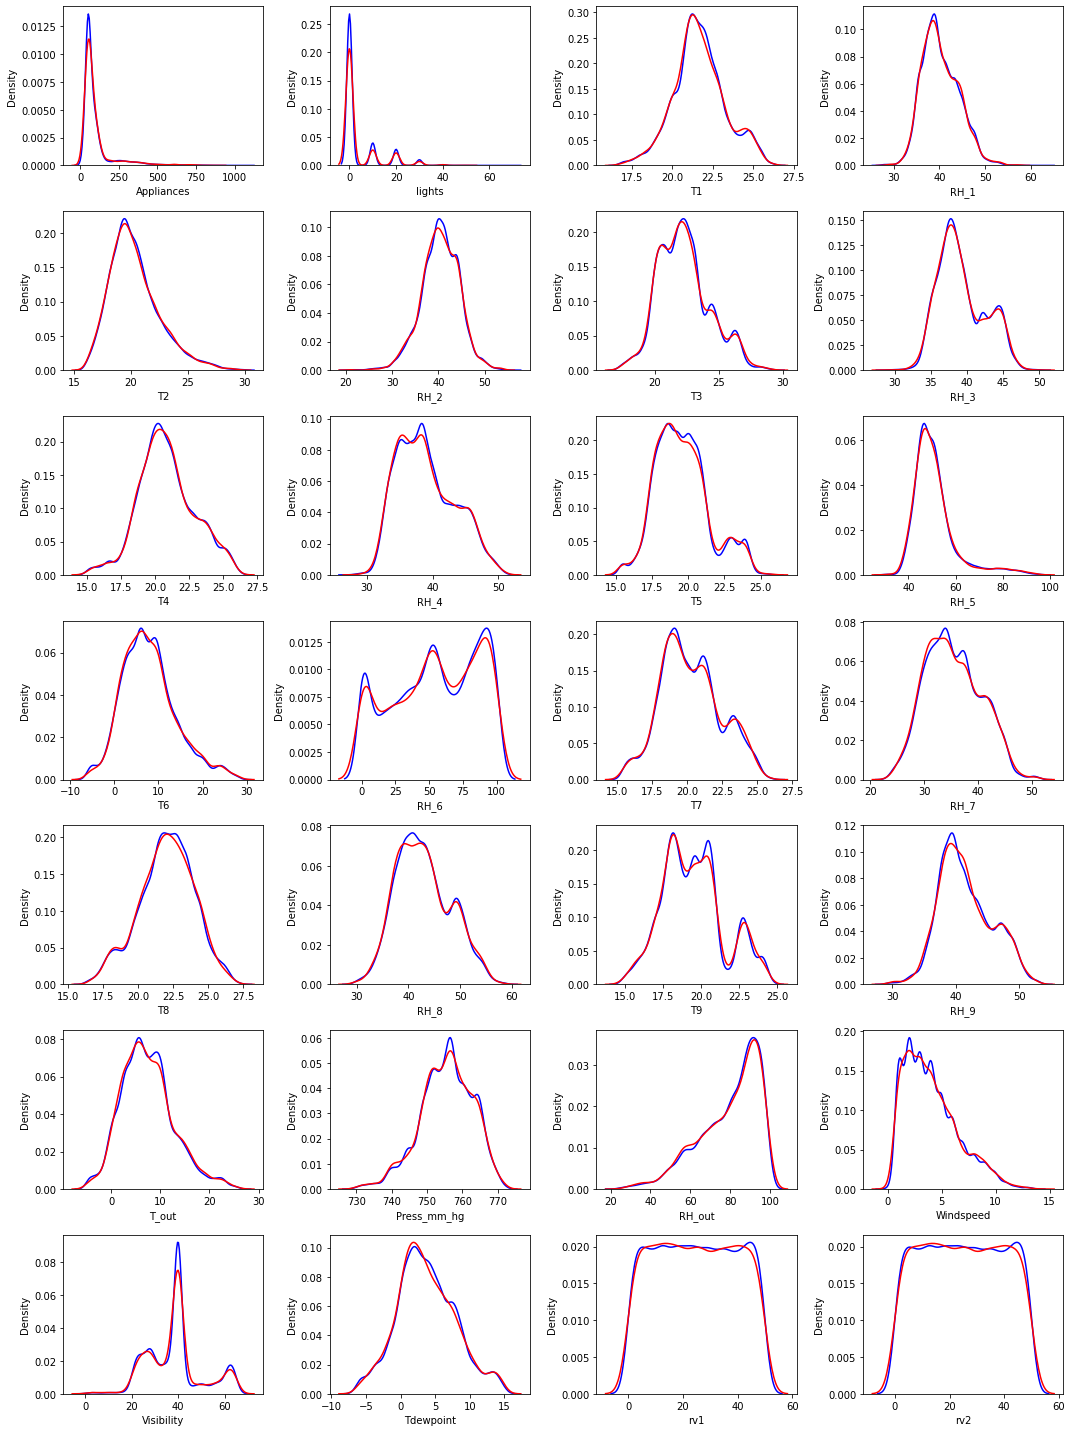

In [ ]:
# Check for distribution of train and test data for all the features

fig, ax = plt.subplots(7, 4, figsize=(15, 20))
ax = ax.flatten()

for i, icol in enumerate(df_train.columns[1:]):
    sns.kdeplot(data=df_train, x=icol, color="b", ax=ax[i])
    sns.kdeplot(data=df_test, x=icol, color="r", ax=ax[i])

plt.tight_layout()
plt.show()

1. Temperature - All the columns follow normal distribution except T9
2. Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house 
3. Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column 
4. Visibilty - This column is negatively skewed
5. Windspeed - This column is postively skewed

In [ ]:
df_train.lights.value_counts()

0     12167
10     1805
20     1294
30      455
40       58
50        7
60        1
70        1
Name: lights, dtype: int64

In [ ]:
# Seperate features and target variable for both train and test data
drop_cols = ["Appliances", "rv1", "rv2", "date", "lights"]
X_train = df_train.drop(drop_cols, axis=1)
y_train = df_train["Appliances"]

X_test = df_test.drop(drop_cols, axis=1)
y_test = df_test["Appliances"]

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

Train data: ((15788, 24), (15788,))
Test data: ((3947, 24), (3947,))


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Create test and training set by including Appliances column
df_train = df_train[list(X_train.columns.values) + col_target]
df_test = df_test[list(X_test.columns.values) + col_target]

# Create dummy test and training set to hold scaled values
sc_train = pd.DataFrame(columns=df_train.columns, index=df_train.index)
sc_train[sc_train.columns] = scaler.fit_transform(df_train)

sc_test = pd.DataFrame(columns=df_test.columns, index=df_test.index)
sc_test[sc_test.columns] = scaler.fit_transform(df_test)

In [ ]:
# Remove Appliances column from traininig set
X_train = sc_train.drop(["Appliances"], axis=1)
y_train = sc_train["Appliances"]

X_test = sc_test.drop(["Appliances"], axis=1)
y_test = sc_test["Appliances"]

# Model Implementation

**Linear regression models**

1. Lasso regression 

2. Ridge regression 

**Support Vector Machine**

3. Support vector regression 

**Nearest neighbour Regressor**

4. KNeighborsRegressor

**Ensemble models**

5. Random Forest Regressor

5. Gradient Boosting Regressor

7. ExtraTrees Regressor

8. Extreme Gradient Boosting with XGBoost

**Neural Network**

9. Multi Layer Preceptron Regressor

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
)
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
models = [
    ["Lasso: ", Lasso()],
    ["Ridge: ", Ridge()],
    ["KNeighborsRegressor: ", neighbors.KNeighborsRegressor()],
    ["SVR:", SVR(kernel="rbf")],
    ["RandomForest ", RandomForestRegressor()],
    ["ExtraTreeRegressor :", ExtraTreesRegressor()],
    ["GradientBoostingClassifier: ", GradientBoostingRegressor()],
    ["XGBRegressor: ", xgb.XGBRegressor()],
    [
        "MLPRegressor: ",
        MLPRegressor(
            learning_rate="adaptive", max_iter=1000, learning_rate_init=0.01, alpha=0.01
        ),
    ],
]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

model_data = []
for name, curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train, curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test, curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(
        mean_squared_error(y_test, curr_model.predict(X_test))
    )
    model_data.append(curr_model_data)

[17:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Convert list to dataframe
result = pd.DataFrame(model_data)

In [ ]:
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.011355,0.000000,0.000000,1.000000
1,Ridge:,0.006390,0.148893,0.135823,0.929611
2,KNeighborsRegressor:,0.002835,0.694895,0.448544,0.742601
3,SVR:,13.202495,0.244565,0.207276,0.890351
4,RandomForest,37.626778,0.940843,0.521596,0.691667
5,ExtraTreeRegressor :,9.024505,1.000000,0.610194,0.624344
6,GradientBoostingClassifier:,8.396306,0.332142,0.228382,0.878418
7,XGBRegressor:,1.692336,0.329080,0.226521,0.879476
8,MLPRegressor:,10.073694,0.458931,0.306738,0.832623


1. Best results over test set are given by Extra Tree Regressor
2. Least RMSE score is also by Extra Tree Regressor
3. Lasso regression was worst performing model


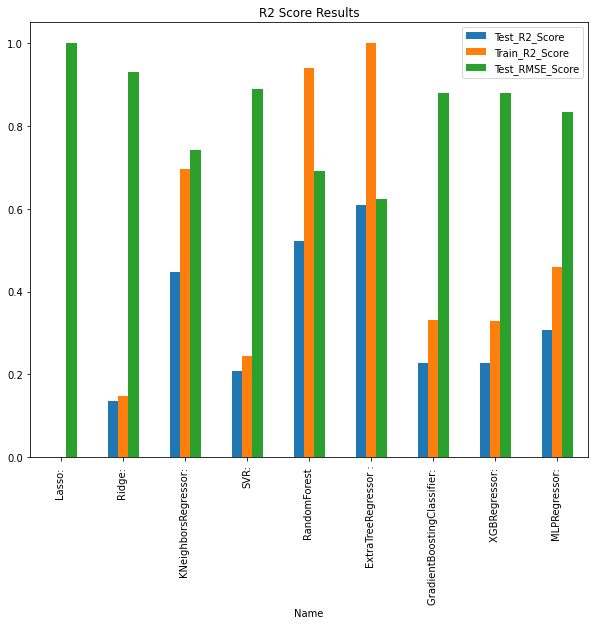

In [ ]:
result.plot(
    x="Name",
    y=["Test_R2_Score", "Train_R2_Score", "Test_RMSE_Score"],
    kind="bar",
    title="R2 Score Results",
    figsize=(10, 8),
);

# Time Series Analysis

Since we are doing time series analysis, we first convert the date column to datetime datatype and set is as the index column

In [7]:
df_ts = df[:]

In [8]:
df_ts["date"] = pd.to_datetime(df_ts["date"])
df_ts = df_ts.iloc[:, 0:2]
df_ts = df_ts.set_index("date")
df_ts

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


In [9]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


## Visualizing data

Text(0, 0.5, 'Energy usage in Wh')

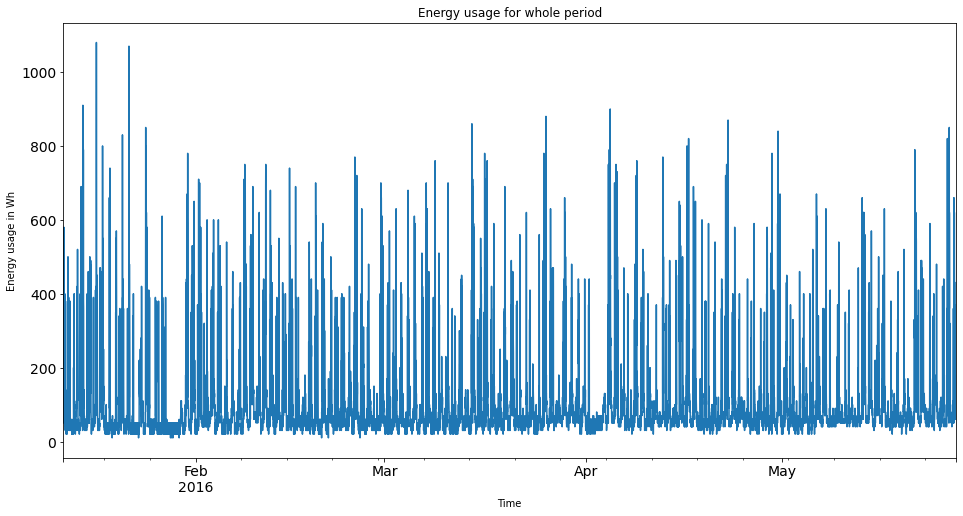

In [10]:
df_ts["Appliances"].plot(
    figsize=(16, 8), title="Energy usage for whole period", fontsize=14
)
plt.xlabel("Time")
plt.ylabel("Energy usage in Wh")

We can see that there is an obvious seasonality component

Text(0, 0.5, 'Energy usage in Wh')

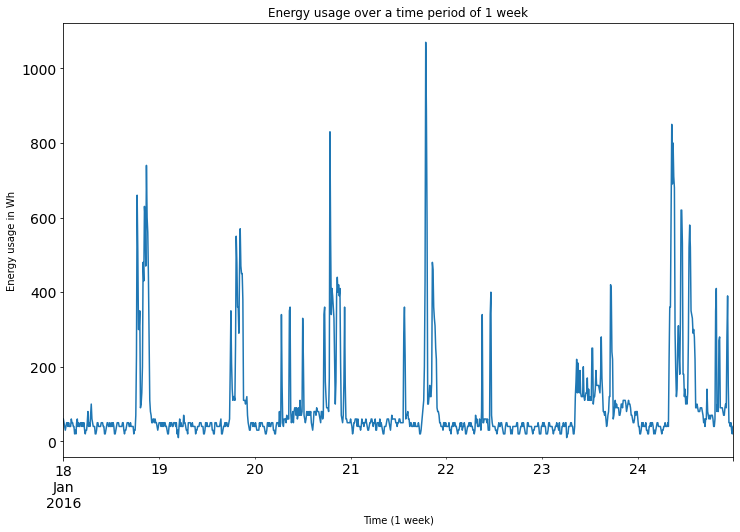

In [11]:
# Visualizing energy usage for a week to get a clear view of data distribution

df_ts.Appliances["2016-01-18":"2016-01-24"].plot(
    figsize=(12, 8), title="Energy usage over a time period of 1 week", fontsize=14
)
plt.xlabel("Time (1 week)")
plt.ylabel("Energy usage in Wh")

Text(0.5, 1.0, 'Appliances energy consumption distribution')

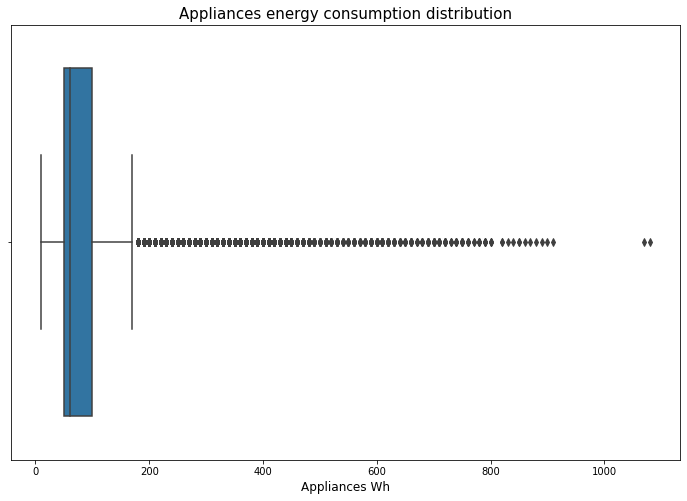

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Appliances", data=df_ts)
plt.xlabel("Appliances Wh", fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

This shows that the data above the median is more dispersed and that there are several outliers

## Stationarity of Data

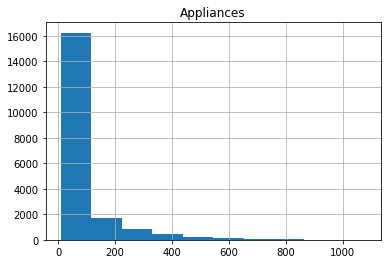

In [13]:
df_ts.hist()
plt.show()

 A log transform can be used to flatten out exponential change back to a linear relationship.

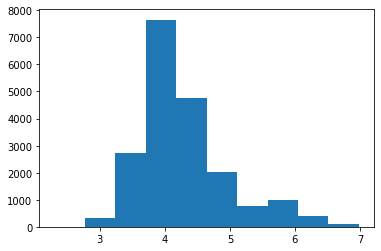

In [14]:
# taking log

X = df_ts.values
X = np.log(X)
plt.hist(X)
plt.show()

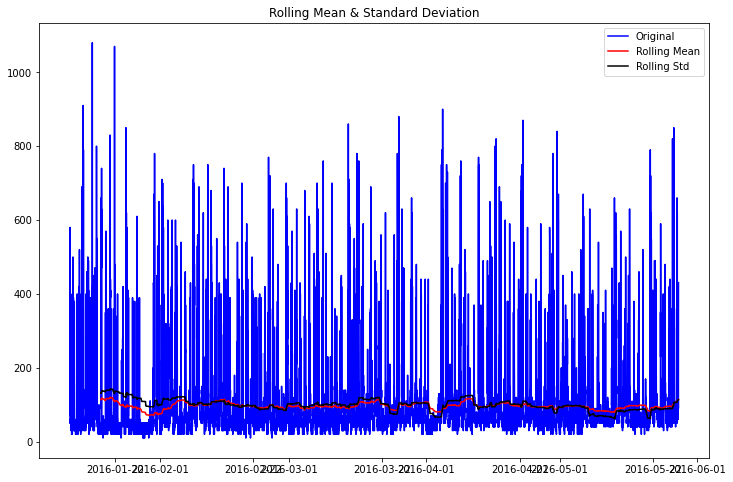

Results of Dickey-Fuller Test:
Test Statistic                   -21.616378
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19723.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64


In [15]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):

    # Determing rolling statistics
    rolmean = timeseries.rolling(
        center=False, window=1008
    ).mean()  # ,weekly seasonal data 6*24*7
    rolstd = timeseries.rolling(center=False, window=1008).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(
        timeseries.Appliances, autolag="AIC"
    )  # gives the exact values actual values and analyzes difference between them
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


test_stationarity(df_ts)

The Dickey-Fuller test statistic value of -21.61 is less than the value of -3.431 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

Since p-value>=0.05, we can reject the null hypothesis, the data does not have a unit root and is stationary.

In [16]:
# Splitting data into Train and test data

train = df_ts.iloc[: np.int64(len(df_ts) * 0.75)]
test = df_ts.iloc[np.int64(len(df_ts) * 0.75) :]

### STL Decomposition

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

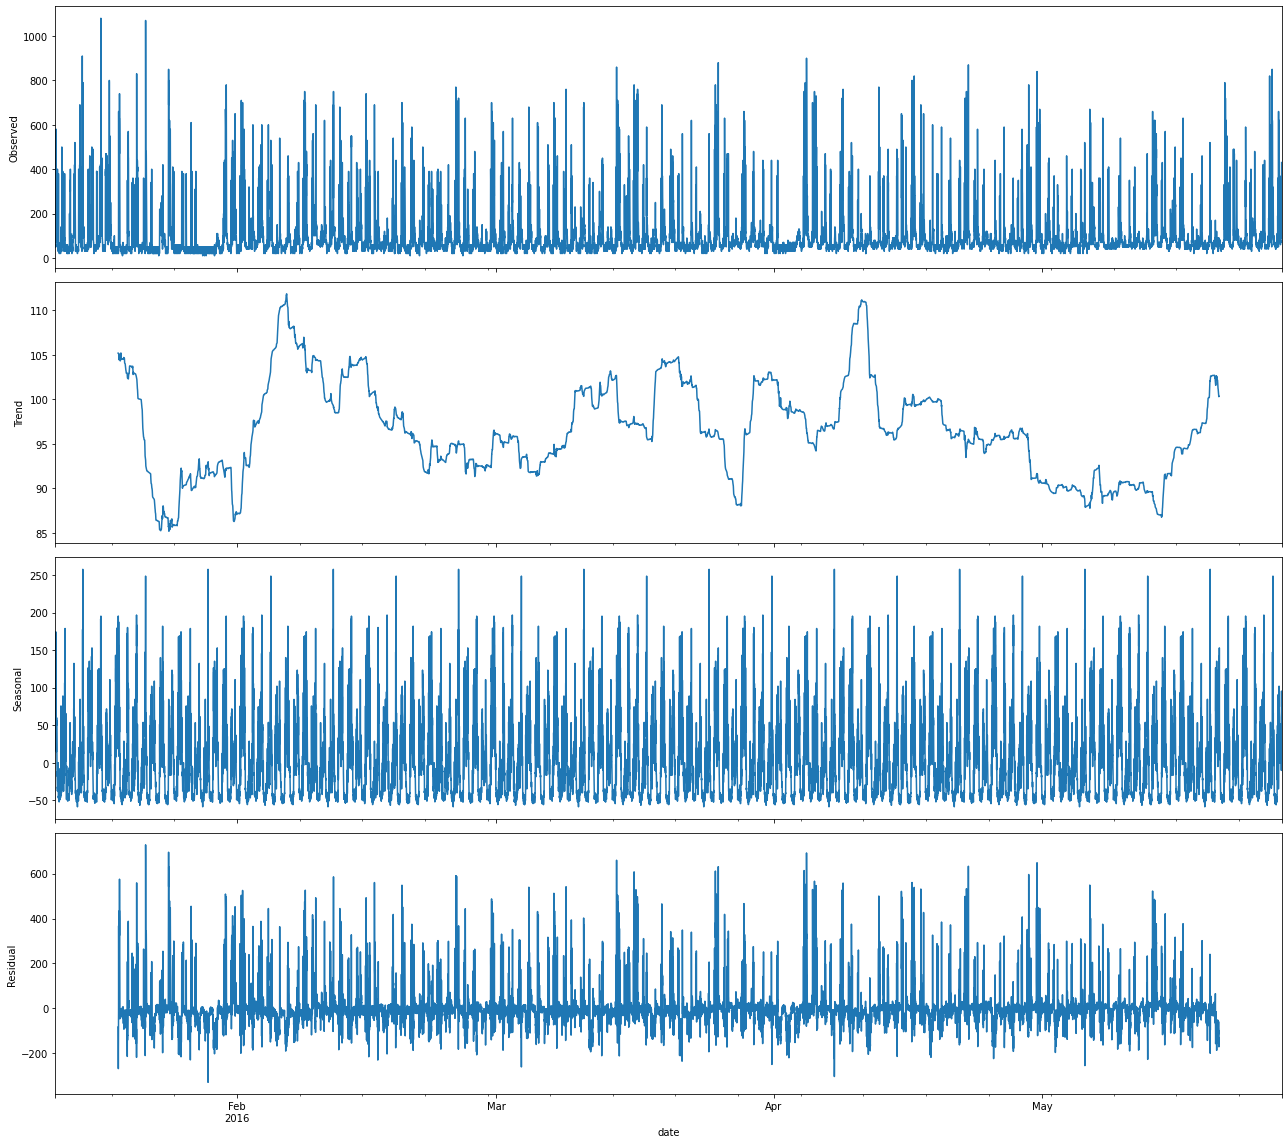

In [18]:
decompfreq = 6 * 24 * 14  # frequency is in weeks
result = seasonal_decompose(df_ts, freq=decompfreq, model="additive")
rcParams["figure.figsize"] = 18, 16
fig = result.plot()
plt.show()

residual = result.resid
seasonal = result.seasonal
trend = result.trend

In [19]:
# Checking if there are any null values.
residual.isnull().values.any()

True

In [20]:
# dopping NaN values
residual.dropna(inplace=True)

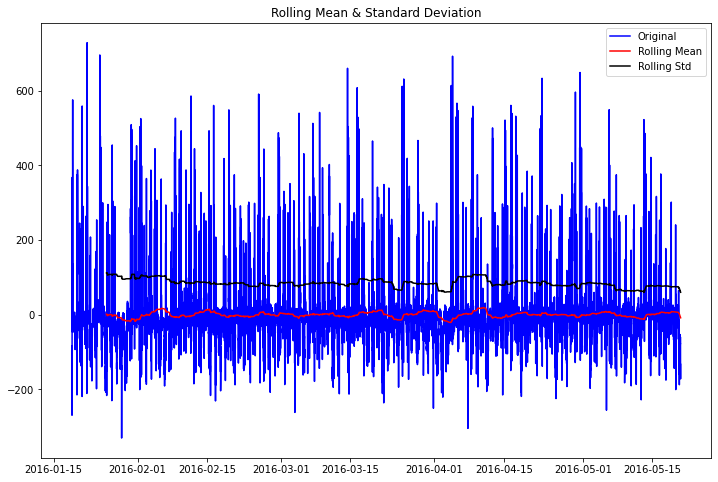

Results of Dickey-Fuller Test:
Test Statistic                   -21.632516
p-value                            0.000000
#Lags Used                        12.000000
Number of Observations Used    17706.000000
Critical Value (1%)               -3.430719
Critical Value (5%)               -2.861703
Critical Value (10%)              -2.566857
dtype: float64


In [21]:
# checking stationarity of residual
test_stationarity(residual)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.

### Plotting ACF and PACF

We plot ACF and PACF graphs to determine p and q parameters and then we pass  to ARIMA model

In [22]:
from statsmodels.tsa.stattools import acf, pacf

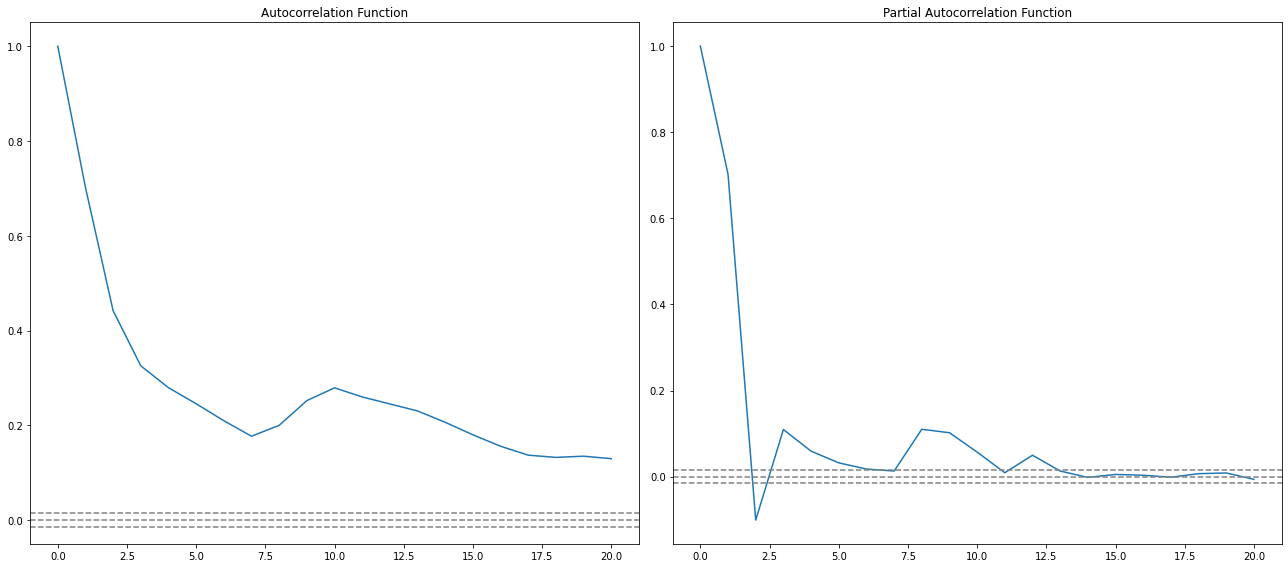

In [23]:
ts_column = residual["Appliances"]

acf_cases = acf(ts_column, nlags=20)
pacf_cases = pacf(ts_column, nlags=20, method="ols")

rcParams["figure.figsize"] = 18, 8
plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96 / np.sqrt(len(ts_column)), linestyle="--", color="gray")
plt.axhline(y=1.96 / np.sqrt(len(ts_column)), linestyle="--", color="gray")
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96 / np.sqrt(len(ts_column)), linestyle="--", color="gray")
plt.axhline(y=1.96 / np.sqrt(len(ts_column)), linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

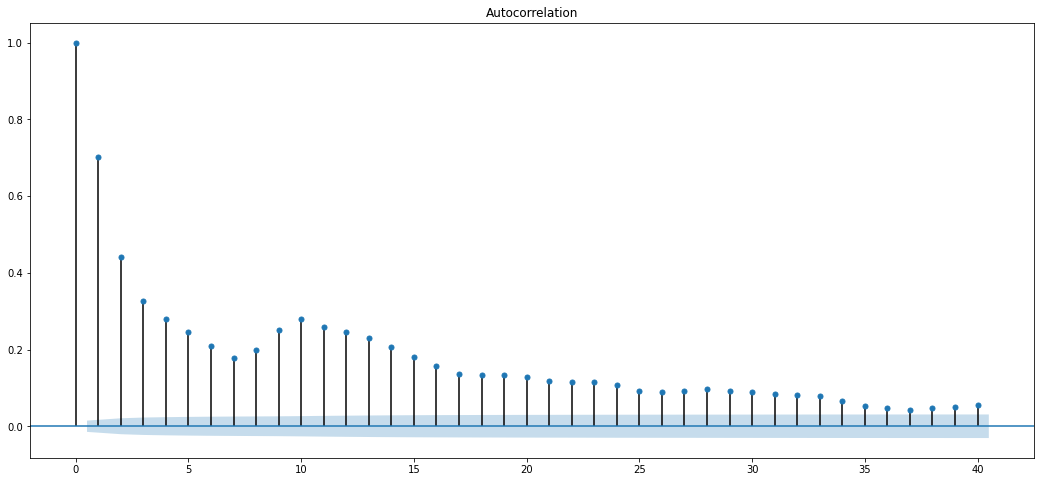

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1 = plot_acf(ts_column, lags=40)

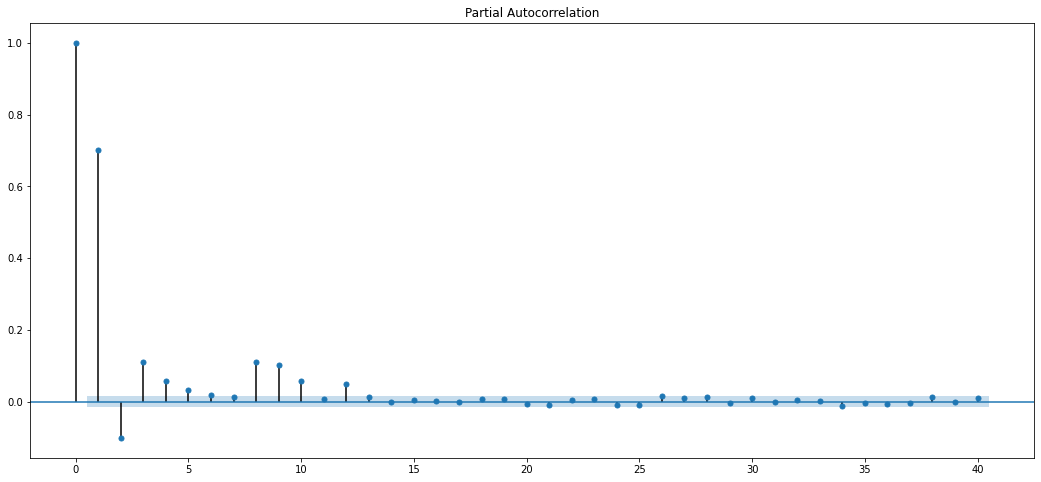

In [25]:
fig2 = plot_pacf(ts_column, lags=40)

## Implementing ARIMA model

In [77]:
from statsmodels.tsa.arima_model import ARIMA

model_ARIMA = ARIMA(residual.Appliances, order=(2, 0, 2))
results_ARIMA = model_ARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)


In [61]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:             Appliances   No. Observations:                17719
Model:                     ARMA(2, 2)   Log Likelihood              -97629.285
Method:                       css-mle   S.D. of innovations             59.794
Date:                Wed, 20 Jul 2022   AIC                         195270.569
Time:                        19:19:52   BIC                         195317.264
Sample:                    01-18-2016   HQIC                        195285.936
                         - 05-20-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7767      2.740     -0.284      0.777      -6.146       4.593
ar.L1.Appliances     1.3767      0.016     86.027      0.000       1.345       1.408
ar.L2.Appliances    -0.3980 

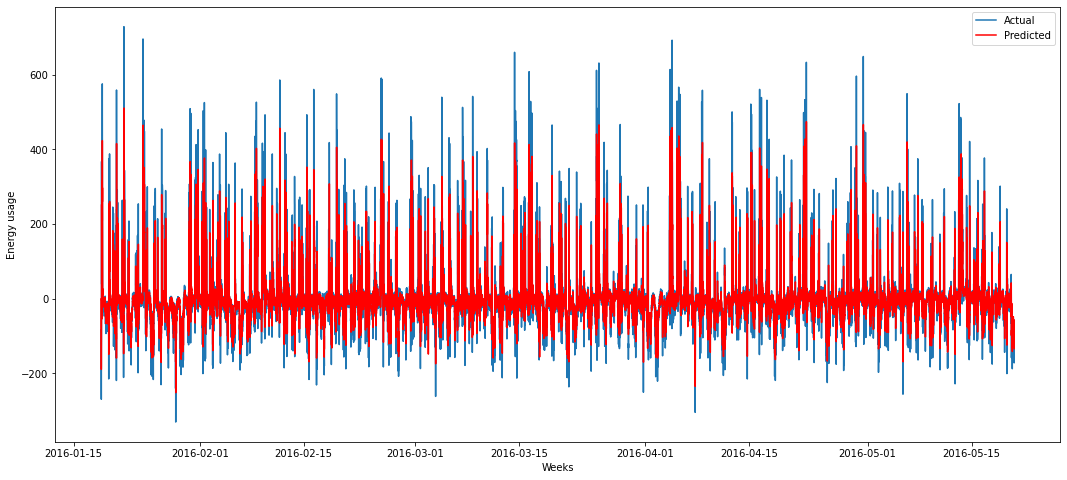

In [37]:
plt.plot(ts_column, label="Actual")
plt.plot(results_ARIMA.fittedvalues, color="red", label="Predicted")
plt.xlabel("Weeks")
plt.ylabel("Energy usage")
plt.legend(loc="best")

## Prediction

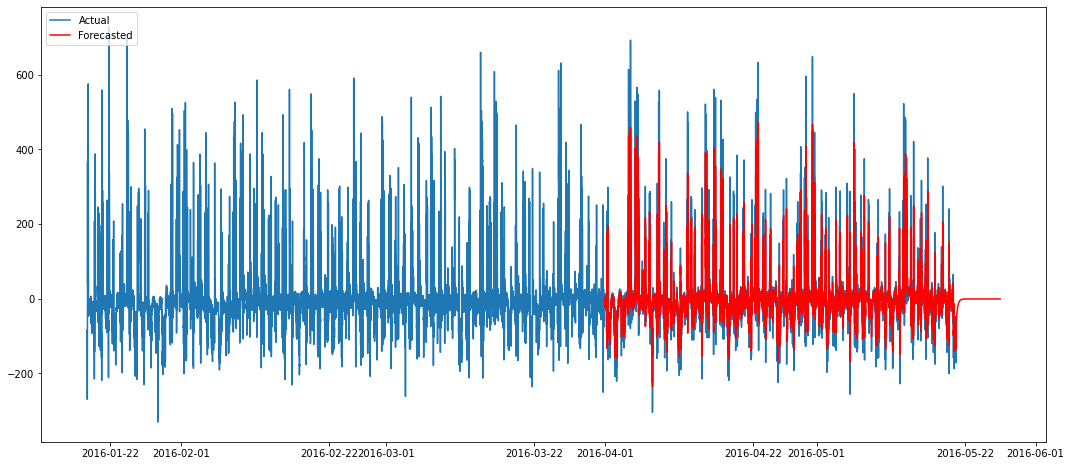

In [38]:
prediction = results_ARIMA.predict(start="2016-04-01", end="2016-05-27")

plt.plot(residual, label="Actual")
plt.plot(prediction, color="red", label="Forecasted")
plt.legend(loc="upper left")

In [80]:
new_seasonal = seasonal.shift(6*24*7)
new_seasonal = new_seasonal.dropna()

In [81]:
prediction = results_ARIMA.fittedvalues.add(new_seasonal.Appliances,fill_value=0)

In [82]:
prediction = prediction.add([np.mean(trend)]*len(prediction),fill_value=0)

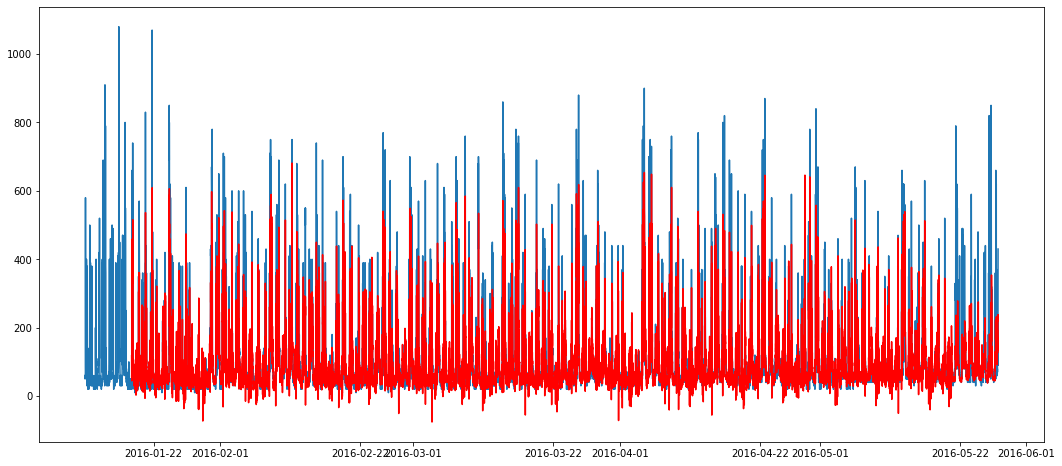

In [84]:
plt.plot(df_ts, label = 'Actual')
plt.plot(prediction, color='red', label = 'Predicted')

In [93]:
mae = (abs(df_ts[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)).mean()
rmse = (((df_ts[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).mean())**0.5
mean = df_ts[-3000:-2000].Appliances.values.mean()
r2 = 1 - ((df_ts[-3000:-2000].Appliances.values - prediction[-3000:-2000].values)**2).sum() / ((mean - prediction[-3000:-2000].values)**2).sum()
mape = (abs((df_ts[-3000:-2000].Appliances.values - prediction[-3000:-2000].values) / df_ts[-3000:-2000].Appliances.values)).mean()

In [94]:
evaluation = pd.DataFrame(data=[[mae,rmse,r2.Appliances,mape]],index=['ARIMA'], columns=['MAE','RMSE','R-Square','MAPE'])
evaluation

,MAE,RMSE,R-Square,MAPE
ARIMA,37.213945,65.619005,0.27219,0.41052
